In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataLoad import *
from dataPlot import *
from dataStatistics import *

In [2]:
data = dataLoad("turbine_32x32x8192.bin",32,32,8192)

In [3]:
data = np.abs(data)

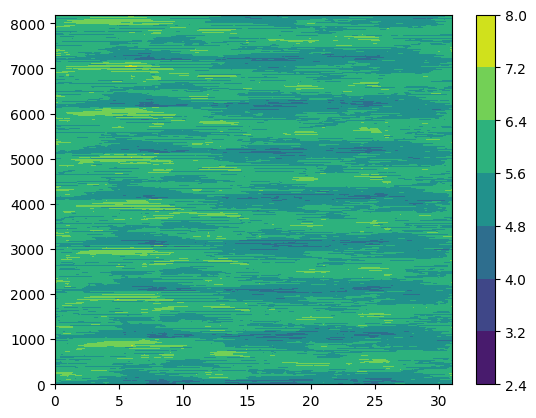

In [4]:
dataPlot(data, "mean")

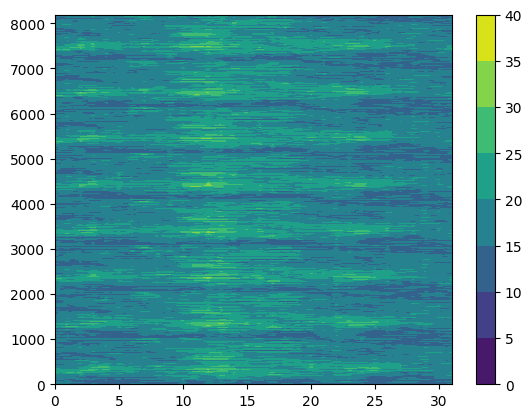

In [5]:
dataPlot(data, "variance")

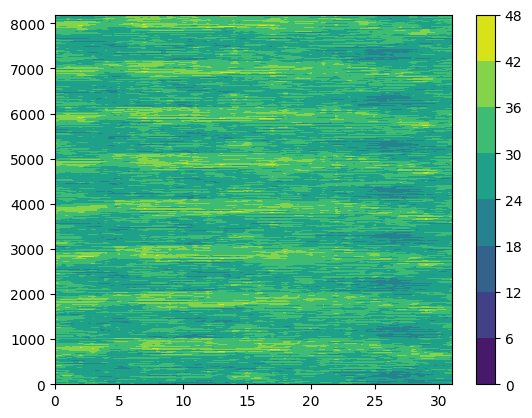

In [6]:
dataPlot(data, "cross-correlation", 4000, 31, 20)

In [12]:
dataStatistics(data, "mean")

array([[5.044406 , 4.9358697, 4.691531 , ..., 5.2576613, 5.1784964,
        5.124216 ],
       [5.123379 , 4.93841  , 4.3271194, ..., 4.6287727, 5.7554226,
        4.9913464],
       [5.0984793, 4.3578377, 4.215962 , ..., 4.525262 , 5.1667585,
        5.4175386],
       ...,
       [5.324692 , 5.3173933, 5.4267282, ..., 4.604704 , 4.8620887,
        5.295064 ],
       [5.3664374, 5.9297023, 6.0341215, ..., 4.3427267, 4.4986715,
        5.033225 ],
       [5.399841 , 5.7608337, 5.1134305, ..., 5.1969414, 4.0914464,
        5.0483327]], dtype=float32)